In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cvičení 6 & 7: Problém vlastních čísel

---
- [poznámky z přednášky - částečný problém vlastních čísel](https://www.karlin.mff.cuni.cz/~blechta/znm/assets/Castecny_problem_cisel.pdf)
- [poznámky z přednášky - úplný problém vlastních čísel](https://www.karlin.mff.cuni.cz/~blechta/znm/assets/Uplny_problem_cisel.pdf)
- další materiály
  - kniha [Duintjer Tebbens a kolektiv: Analýza metod pro maticové výpočty](https://cuni.primo.exlibrisgroup.com/discovery/fulldisplay?docid=alma990020832750106986&context=L&vid=420CKIS_INST:UKAZ&lang=cs&search_scope=MyInst_and_CI&adaptor=Local%20Search%20Engine&tab=Everything&query=any,contains,Anal%C3%BDza%20metod%20pro%20maticov%C3%A9%20v%C3%BDpo%C4%8Dty&offset=0) (Kapitola 7)
  - skripta [Barto, Tůma: Lineární algebra](https://www.mff.cuni.cz/data/web/obsah/department_math/ka/skripta_la7.pdf) (Sekce 8.6)
  - bakalářská práce [Cirbus: Implicitní QR algoritmus s násobnými
shifty](https://dl1.cuni.cz/pluginfile.php/1987032/mod_resource/content/1/BCprace_QRalgoritmus.pdf)
  - "objevitelé" vlastních čísel [Cauchy a Sylvester](https://old.maa.org/press/periodicals/convergence/math-origins-eigenvectors-and-eigenvalues).

- ***Primární úlohy*** (verze 1 cviko) : A1, A2, B1
- ***Primární úlohy*** (verze 2 cvika) : A1, A2, A3, B1, B2, B3

- ***Úlohy k bonusové části zkoušky*** : A1, A3, B1

- základní ***Learning outcomes*** (cviko, nikoliv přednáška)
  - Umím definovat *Rayleigho quotient* a vysvětlit jeho roli v kontextu problému vlastních čísel.
  - Umím porovnat mocninnou metodu a Lanczošovu metodu pro aproximaci dominatního vlastního páru.
  - Umím interpretovat Lanczošovu metodu jako zobecnění mocninné metody.
---

## Intro

Spektrální faktorizace matic znáte z lingebry, ale pro jistotu si je tu připomeneme.

### [EVD (eigenvalue decomposition)](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix)
>Pokud má matice $A\in \mathbb{R}^{n\times n}$ $n$ vlastních párů $(\lambda_1,\mathbf{v}_1), \dotsc , (\lambda_n,\mathbf{v}_n)$, tj. platí $A\mathbf{v}_i = \lambda_i \mathbf{v}_i$ a $\| \mathbf{v}_i \|_2=1$ pro všechna $i=1,\dotsc ,n$, pak ji lze napsat jako
>
>$$
A = V\Lambda V^{-1}
\qquad \mathrm{kde}\qquad
V = \left[ \mathbf{v}_1, \dotsc , \mathbf{v}_n \right] \quad \mathrm{a} \quad \Lambda = \begin{bmatrix} \lambda_1 \\ & \ddots \\ && \lambda_n \end{bmatrix}.
$$
>
>Matici $V$ lze volit jako ***unitární*** právě tehdy, když $A$ je ***normální***, tj. $A^TA = AA^T$.
Matici $V$ lze volit jako ***unitární*** a ***reálnou*** právě tehdy, když $A$ je ***symetrická***, tj. $A = A^T$; v takovém případě máme všecha vlastní čísla $\lambda_i$ reálná.


Problém nalezení jednoho (všech) vlatních párů dané matice se nazývá ***částečný (úplný) problém vlastních čísel*** a na tomhle cviku si projdeme některé z metod, které se používají pro ***částečný problém vlastních čísel*** - tedy když chceme aproximovat pouze několik vlastních čísel.

## Část A: Částečný problém vlastních čísel & [Mocninná metoda](https://en.wikipedia.org/wiki/Power_iteration)

Jedná se o metodu pro nalezení ***dominantního vlastního páru***, tj. vlastního páru odpovídajícího vlastnímu číslu s nejvštší absolutní hodnotou, tj. $|\lambda_{max}| = \max \{|\lambda_1|, \dots ,|\lambda_n| \}$.

Na přednášce jsme si tuto metodu odvodili na vcelku přímočarém pozorování ***pro diagonalizovatelné matice***. Předpokládejme, že $A$ je diagonalizovatelná a uspořádáme si její vlastní páry podle absolutní hodnoty vlastních čísel, tj. vezmeme si vlastní páry $(\mathbf{s}_1,\lambda_1),\dots ,(\mathbf{s},\lambda_n)$ tak aby
$$|\lambda_1| \geq |\lambda_2|  \geq \dots \geq |\lambda_n|. $$

Pak máme spektrální rozklad $A$
$$ A = \underbrace{\, [\mathbf{s}_1,\dots ,\mathbf{s}_n] \, }_{=: \, S\in \, \mathbb{R}^{n\times n}} \begin{bmatrix} \lambda_1 \\ &\ddots \\ &&\lambda_n \end{bmatrix} \underbrace{\, [\mathbf{s}_1,\dots ,\mathbf{s}_n]^{-1} \, }_{=: \, S^{-1} \in \, \mathbb{R}^{n\times n}} \equiv SDS^{-1}$$

a pro libovolný počáteční vektor $\mathbf{w}_0 \in \mathbb{R}^n$ platí

\begin{equation*}
\begin{aligned}
    A^k \mathbf{w}_{0} &= \left( S D S^{-1} \right)^k \mathbf{w}_0 = S D^k S^{-1} \mathbf{w}_0 = S D^k \begin{bmatrix} c_1 \\ \vdots \\ c_n \end{bmatrix} = \\
    &= [\mathbf{s}_1,\dots ,\mathbf{s}_n] \begin{bmatrix} \lambda_1^kc_1 \\ \vdots \\ \lambda_n^kc_n \end{bmatrix} = c_1\lambda_1^k \mathbf{s}_1 + \dotsc + c_n\lambda_n^k \mathbf{s}_n = \\
    &= \lambda_1^k \left( c_1 \mathbf{s}_1 + c_2 \Bigg( \underbrace{\frac{\lambda_2}{\lambda_1} }_{|\,\cdot \,|\, \leq \,1} \Bigg)^k \mathbf{s}_2 + \dotsc + c_n \Bigg( \underbrace{\frac{\lambda_n}{\lambda_1} }_{|\,\cdot \,|\,  \leq \,1} \Bigg)^k \mathbf{s}_n \right). \qquad (\star \star)
\end{aligned}
\end{equation*}

Jinými slovy, ***pokud*** $|\lambda_1| > |\lambda_2| \geq \dots \geq |\lambda_n|$ a zároveň $\mathbf{w}_0 \not\perp \mathbf{s}_1$ (tj. $c_1\neq 0$), ***pak*** bude vektor $A^k\mathbf{w}_0$ konvergovat k dominantnímu vlastnímu vektoru $\mathbf{s}_1$.

Idea mocniné metody je založená právě na tomto pozorování - iterativně aproximujeme dominantní vlastní vektor $\mathbf{s}_1$ jako

$$
\mathbf{w}_0 \mapsto \mathbf{v}_0 := \frac{\mathbf{w}_0}{\|\mathbf{w}_0\|_2} \approx \mathbf{s}_1,\\
\mathbf{w}_1 := A\mathbf{w}_0 \mapsto \mathbf{v}_1 := \frac{\mathbf{w}_1}{\|\mathbf{w}_1\|_2} \approx \mathbf{s}_1,\\
\mathbf{w}_2 := A\mathbf{w}_1 \mapsto \mathbf{v}_2 := \frac{\mathbf{w}_2}{\|\mathbf{w}_2\|_2} \approx \mathbf{s}_1,\\
\mathbf{w}_3 := A\mathbf{w}_2 \mapsto \mathbf{v}_3 := \frac{\mathbf{w}_3}{\|\mathbf{w}_3\|_2} \approx \mathbf{s}_1,\\
\vdots \\
\mathbf{w}_k := A\mathbf{w}_{k-1} \mapsto \mathbf{v}_k := \frac{\mathbf{w}_k}{\|\mathbf{w}_k\|_2} \approx \mathbf{s}_1,\\
\vdots
$$

pro nějaký počáteční vektor $\mathbf{w}_0$. Pokud bereme $\mathbf{w}_0$ jako náhodný vektor z normálního rozdělenmí, pak $\mathbf{w}_0 \not\perp \mathbf{s}_1$ je pro $n>50$ "téméř jistě pravda" - jinými slovy, je rozumné volit $\mathbf{w}_0$ jako náhodný vektor jehož prvky odpovídají standardnímu normální rozdělení $\mathcal{N}(0,1)$.


Pokud mám v $k$-tém kroku aporximaci vlastního vektoru $\mathbf{v}_k\approx \mathbf{s}_1$, často chci i aproximaci $\mu_k$ vlastního čísla $\lambda_1$.
Na přednášce jsme viděli, že dobrá aproximace $\mu_k$ je tzv. [Rayleigh quotient](https://en.wikipedia.org/wiki/Rayleigh_quotient) $R(\mathbf{v}_k)$ definován jako

$$
R(\mathbf{x}) := \frac{\mathbf{x}^TA\mathbf{x}}{\mathbf{x}^T\mathbf{x}}
\qquad \mathrm{a\; tedy \;} \qquad \mu_k := R(\mathbf{v}_k) = \frac{\mathbf{v}_k^TA\mathbf{v}_k}{\mathbf{v}_k^T\mathbf{v}_k}.
$$


### Úloha A1

---
**Tužka a papír**: Předpokládejme, že $A\in\mathbb{R}^{n\times n}$ je symetrická a máme aproximaci $\mathbf{v}_k\approx \mathbf{s}_1$ (například z mocninné metody) a rozepíšeme si náš vektor $\mathbf{v}_k$ jako $\mathbf{v}_k = \mathbf{s}_1 + \varepsilon_k \mathbf{x}_k$ pro nějaké $\varepsilon_k \gtrsim 0$ a jednotkový vektor $\mathbf{x}_k \in \mathbb{R}^{n}$.

- Formulujte, jak budeme měřit
  - ***chybu*** aproximace $\mathbf{v}_k$ ($\mu_k$) vlastního vektoru $\mathbf{s}_1$ (vlastního čísla $\lambda_1$),
  - ***reziduum*** aproximace ($\mu_k$,$\mathbf{v}_k$) vlastního páru ($\lambda_1,\mathbf{s}_1$),

- Kdybychom "neměli přednášku" nabízí se jednoduchá otázka - jak mám volit aproximaci $\mu_k \approx \lambda_1$ na základě $\mathbf{v}_k$? ***Ta*** přirozená odpověď je zvolit $\mu_k \in \mathbb{R}$ tak, abychom minimalizovali chybu $\| A\mathbf{v}_k - \mu_k \mathbf{v}_k \|^2$ - tedy jako řešení $\arg\min\limits_{\mu \in \mathbb{R}} \, \| A\mathbf{v}_k - \mu \mathbf{v}_k \|^2$. Najděte řešení této minimalizační úlohy.

- Abychom si Rayleigh quotient $R(\mathbf{x})$ trochu osahali, odvodíme si některé základní vlastnosti.
  - Čemu se rovná $R(\mathbf{s}_1 + \varepsilon_k \mathbf{x}_k)$ pro perturbovaný vlastní vektor (perturbace ve směru $\mathbf{x}_k$ velikost $\varepsilon_k$)?
  - Co lze říci o rychlosti konvergence $|\lambda_1 - \mu_k| \rightarrow 0$ za předpokladu, že $\varepsilon_k\rightarrow 0$, nebo-li $\mathbf{v}_k\rightarrow \mathbf{s}_1$? Porovnejte rychlost konvergencí $\mu_k \rightarrow \lambda_1$ a $\mathbf{v}_k\rightarrow \mathbf{s}_1$.


- Vezměme si konkrétní příklad
  $$A = \begin{bmatrix} 4 \\ & 3\\ && 2\\ &&& 1\end{bmatrix} \quad \mathrm{a} \quad \mathbf{w}_0 = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1\end{bmatrix}. $$
  K jakému vektoru a jak rychle konvergují vektory $\mathbf{v}_k$ z mocninné metody? Odhadněte předpokládanou velikost chyby approximace vlastního vektoru $\| \mathbf{s}_1 - \mathbf{v}_k \|$ po 70 iteracích na základě $(\star \star)$.

  <details>
  <summary>Chci <font color="red"><b>hint</b></font></summary>
  
  Porovnejte situaci s obecným zápisem $(\star \star)$ - který člen v rozepsání uvnitř závorky bude největší, který bude druhý největší atd.?
  
  </details>

- Změňte matici $A$ an matici $B$ tak, aby byla chyba $\| s_1 - v_k \|$ na stejné úrovni již po 35 iteracích (se stejným počátečním vektorem $v_0 = [1,1,1,1]^T$).  
----

### Úloha A2 - implementace

---
**Kódění** :
- Napište funkci `MocninnaMetoda()` podle anotace.
- Porovnejte výsledek vaší implementace s predikovanou chybou $\| \mathbf{s}_1 - \mathbf{v}_k \|_2$ po 70 iteracích v A1.
- Ověřte, že navrhovaná změna v $A$ vede opravdu ke konvergenci na stejnou úroveň chyby už po 35 iteracích.

----

In [ ]:
def MocninnaMetoda(A,w0,pocetiter):
    """
    Pocitame aproximaci dominantniho vlastniho vektoru a dominantniho vlastniho cisla.

    Input
    -------
    A: ctvercova matice n-krat-n
    w0: pocatecni vektor (v R^n)
    pocetiter: integer; pocet iteraci mocninne metody

    Output
    -------
    VlCisla_aproximace: pole delky "pocetiter+1"; "VlCisla_aproximace[k]" odpovida aproximaci dominantniho vlastniho cisla po "k"-te iteraci
    VlVektor_aproximace: pole rozmeru "n - krat - pocetiter+1"; "VlVektor_aproximace[:,k]" odpovida aproximaci dominantniho vlastniho vektoru po "k"-te iteraci
    Prvni ulozena data by mela odpovidat "pocatecnimu odhadu", tj. "VlVektor_aproximace[:,0] = v0" a "VlCisla_aproximace[0] = mu_0"
    Druha ulozena data by mela odpovidat "prvnimu odhadu", tj. "VlVektor_aproximace[:,0] = v1" a "VlCisla_aproximace[0] = mu_1"
    """
    # inicializace
    ...

    # vypocet
    for ... :

    return VlCisla_aproximace, VlVektor_aproximace


#################################################################### Testovani
def test_MocninnaMetoda():
    A = np.diag(np.array([2,1,0])); w0 = np.ones(A.shape[0]); niter = 10;
    VlCisla, VlVektory = MocninnaMetoda(A,w0,niter)

    assert ( len(VlCisla) == niter+1 ), "output 'VlCisla_aproximace' by mel byt vektor delky 'pocetiter'."
    assert ( VlVektory.shape == np.zeros((len(w0),niter+1)).shape ), "output 'VlVektor_aproximace' by mel byt 2D numpy pole rozmeru 'n'-krat-'pocetiter'."
    assert ( np.linalg.norm(VlVektory[:,0] - w0/np.linalg.norm(w0)) < 1e-13 ), "output 'VlVektor_aproximace' by mel splnovat VlVektor_aproximace[:,0] = w0."
    assert ( np.abs(VlCisla[0] - 1) < 1e-13 ), "pro 'A = diag(2,1,0)' a 'w0=[1,1,1]' bzchom meli dostat 'mu_0 = 1'."
    assert ( np.abs(VlCisla[1] - 1.8) < 1e-13 ), "pro 'A = diag(2,1,0)' a 'w0=[1,1,1]' bzchom meli dostat 'mu_1 = 1.8'."
    return "test_MocninnaMetoda OK"
test_MocninnaMetoda()
#################################################################### Testovani

'test_MocninnaMetoda OK'

Chyba aproximace vl. vektoru pro A po 70 iteracich je: 1.795925998137978e-09
Chyba aproximace vl. vektoru pro B po 35 iteracich je: 1.796161803328183e-09


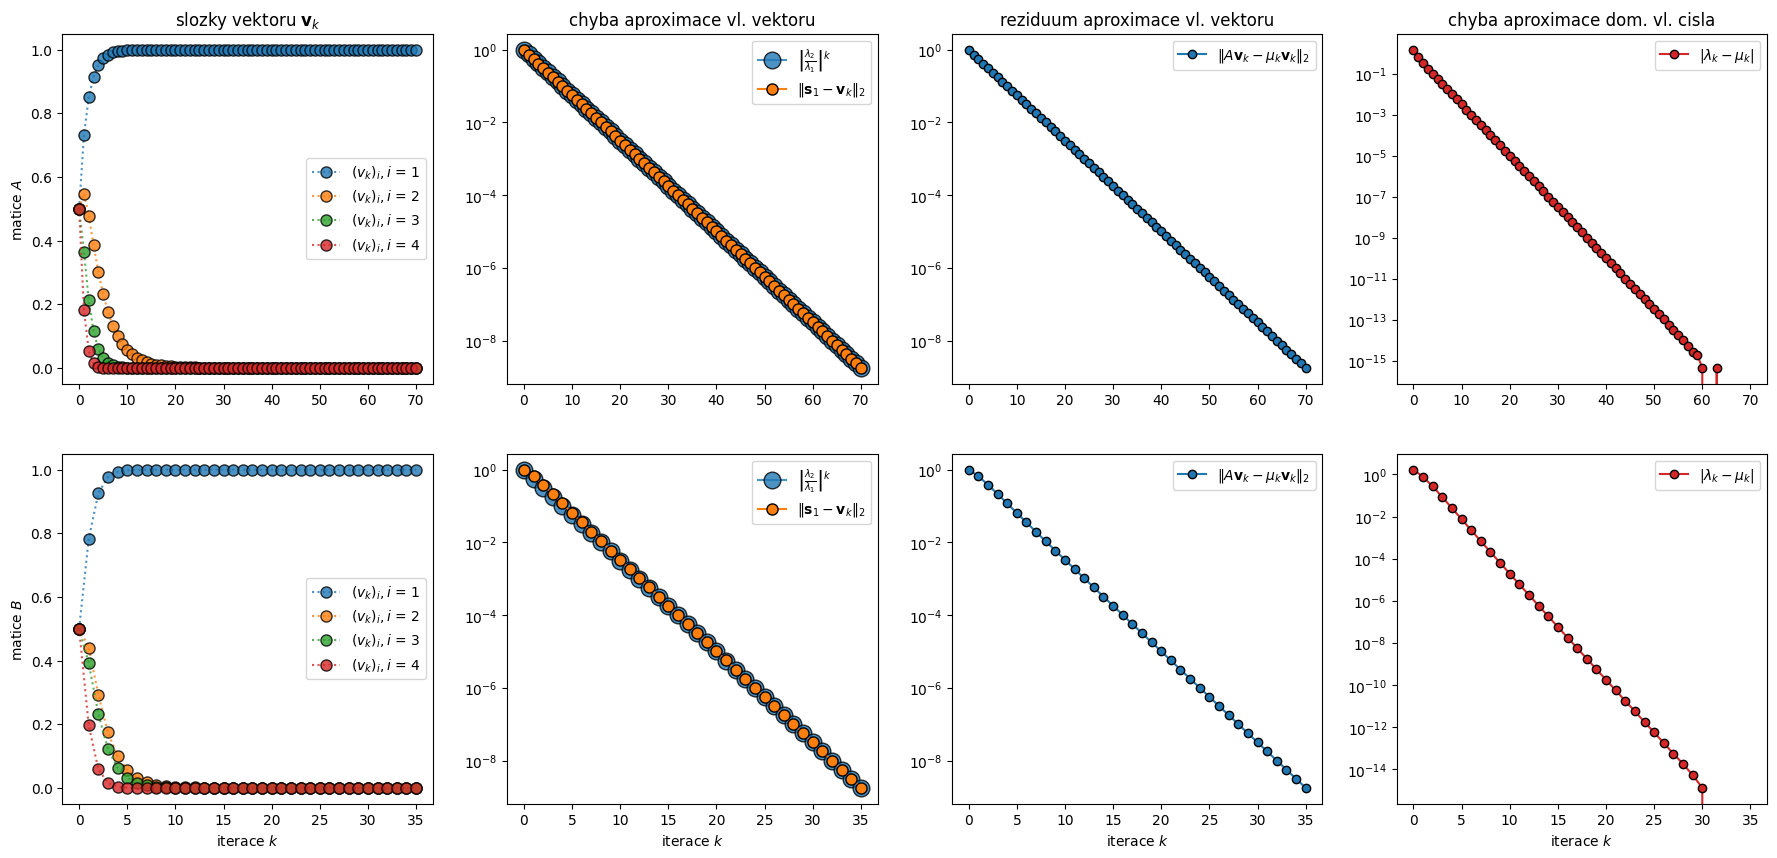

In [ ]:
A = ; w0 = ; pocetiter_A = ;
s1 = np.array([1,0,0,0]); lambda1_A = A[0,0]; lambda2_A = A[1,1]
VlCisla_A, VlVektory_A = MocninnaMetoda(A,w0,pocetiter_A)
print( "Chyba aproximace vl. vektoru pro A po {} iteracich je: {}".format(pocetiter_A, np.linalg.norm(VlVektory_A[:,-1] - s1)) )

B = ; w0 =; pocetiter_B = ;
s1 = np.array([1,0,0,0]); lambda1_B = B[0,0]; lambda2_B = B[1,1]
VlCisla_B, VlVektory_B = MocninnaMetoda(B,w0,pocetiter_B)
print( "Chyba aproximace vl. vektoru pro B po {} iteracich je: {}".format(pocetiter_B, np.linalg.norm(VlVektory_B[:,-1] - s1)) )


############################## Vykreslovani
iter_mesh_A = np.arange(0,pocetiter_A+1,1); iter_mesh_B = np.arange(0,pocetiter_B+1,1)
plt.figure(figsize=(22,10) )
plt.subplot(2,4,1)
for ind in range(0,len(w0)):
  plt.plot(iter_mesh_A, VlVektory_A[ind,:], "o:", markeredgecolor="k", alpha=.8, ms=8, label=r"$(v_k)_i, i$ = {}".format(ind+1))
plt.title(r"slozky vektoru $\mathbf{v}_k$"); plt.ylabel(r"matice $A$"); plt.legend()
plt.subplot(2,4,2)
ChybaVk_mereni = np.linalg.norm(VlVektory_A - s1.reshape((len(w0),1)),  axis=0)
ChybaVk_odhad = (lambda2_A/lambda1_A)**(np.arange(0,pocetiter_A+1))
plt.semilogy(iter_mesh_A, ChybaVk_odhad, "o-", markeredgecolor="k", alpha=.8, ms=12, label=r"$\left| \frac{\lambda_2}{\lambda_1} \right|^k$" );
plt.semilogy(iter_mesh_A, ChybaVk_mereni, "o-", markeredgecolor="k", ms=8, label=r"$\| \mathbf{s}_1 - \mathbf{v}_k\|_2$" );
plt.title(r"chyba aproximace vl. vektoru"); plt.legend()
plt.subplot(2,4,3)
Reziduum = np.linalg.norm(A @ VlVektory_A - VlVektory_A @ np.diag(VlCisla_A),  axis=0)
plt.semilogy(iter_mesh_A, ChybaVk_mereni, "o-", markeredgecolor="k", label=r"$\| A\mathbf{v}_k - \mu_k \mathbf{v}_k\|_2$" );
plt.title(r"reziduum aproximace vl. vektoru"); plt.legend()
plt.subplot(2,4,4)
ChybaVlCisla_mereni = np.abs(lambda1_A - VlCisla_A)
plt.semilogy(iter_mesh_A, ChybaVlCisla_mereni, "o-", markeredgecolor="k", c='tab:red', label=r"$| \lambda_k - \mu_k|$" );
plt.title(r"chyba aproximace dom. vl. cisla"); plt.legend()
plt.subplot(2,4,5)
for ind in range(0,len(w0)):
  plt.plot(iter_mesh_B, VlVektory_B[ind,:], "o:", markeredgecolor="k", alpha=.8, ms=8, label=r"$(v_k)_i, i$ = {}".format(ind+1))
plt.xlabel(r"iterace $k$"); plt.ylabel(r"matice $B$"); plt.legend()
plt.subplot(2,4,6)
ChybaVk_mereni = np.linalg.norm(VlVektory_B - s1.reshape((len(w0),1)),  axis=0)
ChybaVk_odhad = (lambda2_B/lambda1_B)**(np.arange(0,pocetiter_B+1))
plt.semilogy(iter_mesh_B, ChybaVk_odhad, "o-", markeredgecolor="k", alpha=.8, ms=12, label=r"$\left| \frac{\lambda_2}{\lambda_1} \right|^k$" );
plt.semilogy(iter_mesh_B, ChybaVk_mereni, "o-", markeredgecolor="k", ms=8, label=r"$\| \mathbf{s}_1 - \mathbf{v}_k\|_2$" );
plt.xlabel(r"iterace $k$"); plt.legend()
plt.subplot(2,4,7)
Reziduum = np.linalg.norm(A @ VlVektory_B - VlVektory_B @ np.diag(VlCisla_B),  axis=0)
plt.semilogy(iter_mesh_B, ChybaVk_mereni, "o-", markeredgecolor="k", label=r"$\| A\mathbf{v}_k - \mu_k \mathbf{v}_k\|_2$" );
plt.xlabel(r"iterace $k$"); plt.legend()
plt.subplot(2,4,8)
ChybaVlCisla_mereni = np.abs(lambda1_B - VlCisla_B)
plt.semilogy(iter_mesh_B, ChybaVlCisla_mereni, "o-", markeredgecolor="k", c='tab:red', label=r"$| \lambda_k - \mu_k|$" );
plt.xlabel(r"iterace $k$"); plt.legend()
plt.show()
############################## Vykreslovani

### Úloha A3

---
**Tužka a papír**:
- Vezmeme si následujících pět diagonálních matic
\begin{equation*}
\begin{gathered}
A_1 = \begin{bmatrix} 4 \\ & 4\\ && 2\\ &&& 1\end{bmatrix}, \;
A_2 = \begin{bmatrix} 4 \\ & 3.9\\ && 3.8\\ &&& 3.7\end{bmatrix}, \;
A_3 = \begin{bmatrix} -4 \\ & 3\\ && 2\\ &&& 1\end{bmatrix},\\
A_4 = \begin{bmatrix} 4 \\ & -3\\ && 2\\ &&& 1\end{bmatrix}, \;
A_5 = \begin{bmatrix} 4 \\ & 3.9\\ && 2\\ &&& 1\end{bmatrix}.
\end{gathered}
\end{equation*}
a pro každou z nich si představíme, že proběhlo 70 iterací mocninné metody. Spárujte matice $A_1,\dots ,A_5$ s obrázkem níže (každý řádek odpovídá jedné matici a v každém řádku jsou vykresleny 3 věci - složky vektoru $\mathbf{v}_k$, chyba $\|\mathbf{s}_1-\mathbf{v}_k\|_2$ a reziuduum $|A\mathbf{v}_k - \mu_k\mathbf{v}_k|$ pro $k=1,\dots ,70$). Vysvětlete ***proč*** daný obrázek odpovídá dané matici.

- Na druhém řádku obrázku níže chyba i reziduum konvergují ve dvou různých ale stálých režimech - nejprve rychleji (prvních cca pět iterací) a posléze výrazně pomaleji (od desáté iterace dále). Dokážete vysvětlit proč tomu tak je pro chybu $\|\mathbf{s}_1-\mathbf{v}_k\|$? Zkonstruujte příklady, kde je tento rozdíl ještě více extrémní (tj. rozdíl mezi rychlostí konvergence je větší).
- Pro matici $A$ z úlohy A1 najděte nový počáteční vektor $\tilde{\mathbf{w}}_0$ tak aby mocninná metoda konvergovala až k druhému dominantnímu vlastnímu páru, tj. tak aby $\mathbf{v}_k \rightarrow \mathbf{s}_2$.
- Na základě předchozích dvou úloh najděte třetí počáteční vektor $\hat{\mathbf{w}}_0$, pro který mocninná metoda nejprve zdánlivě konverguje k $\mathbf{s}_2$ (prvních několik iterací) ale nakonec zkonverguje k $\mathbf{s}_1$ (po sedmdesáti iteracích).

**Kódění (pouze jako DÚ)**:
- adaptujte kód výše tak, aby ilustroval/ověřoval vaše poslední dvě odpovědi.
----

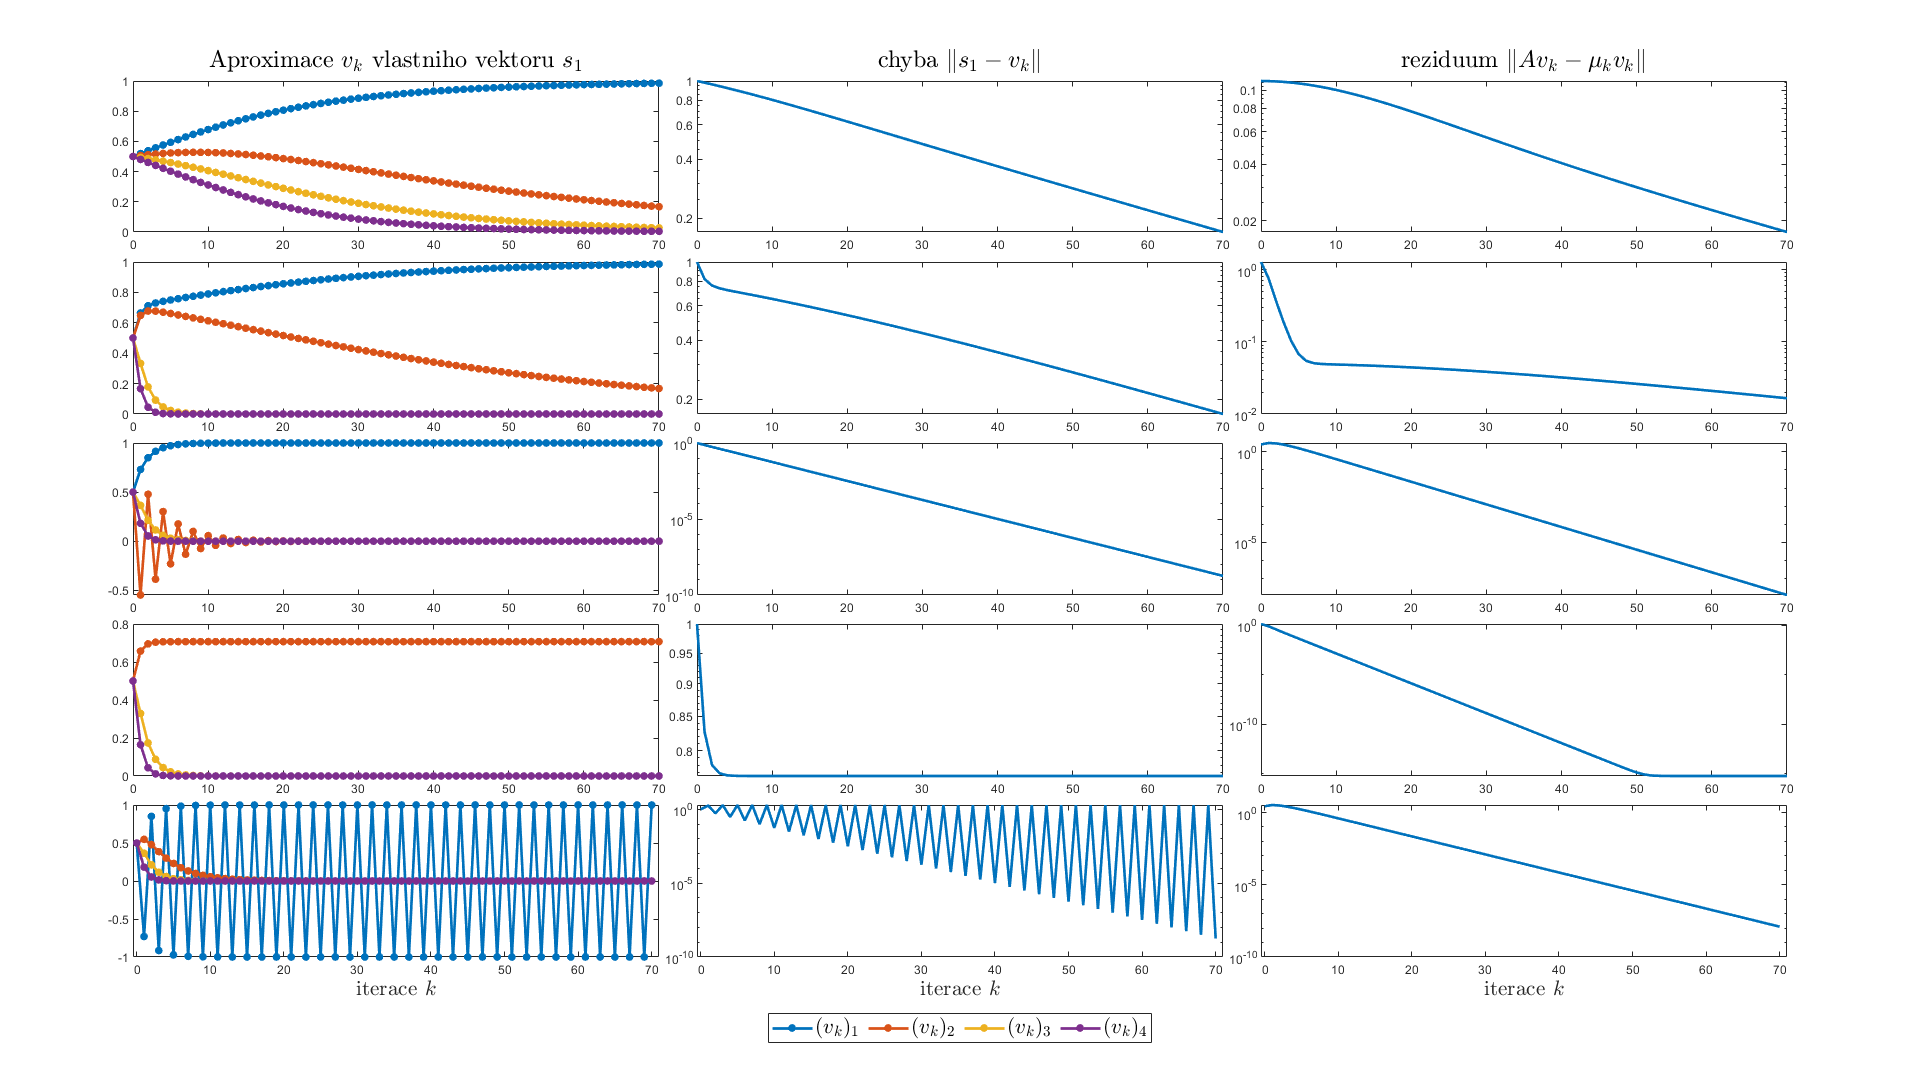

### ZÚ - ["inverse iteration"](https://en.wikipedia.org/wiki/Inverse_iteration)

V mnoha aplikacích ale nechceme nutně aproximovat dominantní vlasntí pár - potřebujem,e tedy adaptovat mocninou metodu výše tak, aby nám dávala více volnosti/možností.

Předpokládejme, že máme symetrickou matici $A\in\mathbb{R}^{n\times n}$ a skalár $\alpha \in \mathbb{R}$ a chceme najít vlastní pár "nejbližší $\alpha$", tj. vlastní pár odpovídající vl. číslu $\lambda_{\alpha}$, pro které
$$|\lambda_{\alpha}-\alpha| = \min\limits_{\lambda \, je \, vl. \, cislo \, A} |\lambda-\alpha|.$$

---
**Tužka a papír**:

- Začneme s $\alpha=0$ - tedy chceme najít vlastní pár odpovídající nejmenšímu vlactnímu číslu v absolutní hodnotě - označme ho $\lambda_{min}$. Adaptujte mocninou metodu, aby aproximovala vlastní pár $\lambda_{min}, \mathbf{s}_{min}$ a uveďte předpoklady, za jakých vaše metoda konverguje.

  <details>
  <summary>Chci <font color="red"><b>hint 1</b></font></summary>
  
  Pokud bychom našli matici $M$, pro kterou je $\lambda_{min}$ ***dominantním*** vlastním číslem, pak by stačilo použít mocninou metodu pro $M$.
  
  </details>

  <details>
  <summary>Chci <font color="red"><b>hint 2</b></font></summary>
  
  Jaká má vlastní čísla matice $A^{-1}$?
  
  </details>
  
- Adaptujte myšlenku výše i pro obecné $\alpha \neq 0$ a formulujte metodu, která bude aproximovat vlastní pár $\lambda_{\alpha}, \mathbf{s}_{\alpha}$. Opět uveďte předpoklady, za jakých vaše metoda konverguje.  

  <details>
  <summary>Chci <font color="red"><b>hint</b></font></summary>
  
  Pro kterou matici $M$ je $\lambda_{\alpha}$ ***minimálním*** vlastním číslem (v absolutní hodnotě)?
  
  </details>
----

## Část B: Částečný problém vlastních čísel & [Metody Krylovovských podprostorů](https://en.wikipedia.org/wiki/Krylov_subspace)

Problémy mocninnné metody v praxi jsou hned dva
  - pokud chci aproximovat "několik" vlastních čísel, musím nechat mocninnnou metody metodu běžet "několikrát",
  - pokud má matice $A$ vlastní čísla $\lambda_i$ pro které $|\lambda_i| \approx |\lambda_{max}|$, pak bude mocninnná metoda konvergovat pomalu.

K vylepšení mocninné metody je zásadní  následující pozorování
> Podobně jako ve 3. cvičení u stacionárních metod pro řešení $A\mathbf{x}=\mathbf{b}$, mocniná metoda je také v jistém smyslu "stacionární" - neadaptujeme naši metodu na základě předešlých aproximací. Naopak, $k$-tý krok vypadá naprosto stejně jako první, třetí nebo patnáctý, pouze ty příkazy
>  - vynásob `vektor na inputu` maticí $A$
>  - znormalizuj výsledný vektor
>  - vypočti aproximaci $\mu$
>
> provádíme na jiný `vektor na inputu` - konkrétně na ten z předchozí iterace. Vektory z iterací $k-2,k-3,\dotsc ,1$ ***už nikdy nepoužíváme***.

Přirozená otázka je, zda-li to nejde lépe - ve 3. cvičení jsme viděli, že pro stacionární metody to v jistém smyslu šlo a souviselo to s tzv. Krylovovskými podprostory. Na přednášce jsme viděli definici tzv. [$k$-tého Krylovova podprostoru příslušejícího $A$ a $\mathbf{v}_0$](https://en.wikipedia.org/wiki/Krylov_subspace) jako

$$ \mathcal{K}_{k}(A,\mathbf{v}_0) \, := \, \mathrm{span} \left( \mathbf{v}_0, A\mathbf{v}_0, \dotsc , A^{k-1}\mathbf{v}_0  \right).$$

Tato posloupnost vektorů by nám měla být z mocninné metody povědomá - až na normalizaci se jedná se o jednotlivé aproximace dominatního vlastního vektoru $\mathbf{s}_1$ z mocninné metody pro počáteční vektor $\mathbf{v}_0$. Pokud chceme "vylepšit" mocninou metodu, následující pozorování je velmi užitečné.

> V $k$-tém kroku mocninné metody jsme doposud pracovali s vektory, které tvoří bázi $\mathcal{K}_{k}(A,\mathbf{v}_0)$, ale rozhodli jsme se vybrat aproximaci vlastního vektoru $\mathbf{s}_1$ jako (normalizovaný) poslední vektor této báze, místo hledání "v nějakém smyslu nejlepší aproximace $\mathbf{s}_1$ z $\mathcal{K}_{k}(A,\mathbf{v}_0)$".

Metody Krylovovských podprostorů v kontextu částečného problému vlastních čísel slouží právě k nalezení "v nějakém smyslu nejlepší aproximace $\mathbf{s}_1$ z $\mathcal{K}_{k}(A,\mathbf{v}_0)$".

> My se podíváme pouze na případ, kdy je ***$A$ symmetrická a pozitivně definitní*** a s ním související [Lanczošovu tridiagonalizaci](https://en.wikipedia.org/wiki/Lanczos_algorithm#).

[Lanczošovu tridiagonalizaci](https://en.wikipedia.org/wiki/Lanczos_algorithm#) jsme viděli na přednášce a nejde o nic jiného než postup jak spočítat ortonormální bázi $\mathcal{K}_k(A,\mathbf{v}_0)$. Jde o upravenou verzi Gram-Schmidtovy ortogonalizace, konkrétně por $k$ krocích dostaneme

$$
\underbrace{\, \begin{bmatrix}
a_{11} & a_{12} & \cdots & \cdots & a_{1n} \\
a_{21} & a_{22} & \ddots &  & \vdots \\
\vdots & \ddots & \ddots & \ddots & \vdots \\
\vdots &  & \ddots & \ddots & \vdots \\
a_{1n} & \cdots & \cdots & \cdots & a_{nn} \\
\end{bmatrix} \,}_{= \; A \; \in \; \mathbb{R}^{n\times n}}
\underbrace{\, \begin{bmatrix}
& & \\
& & \\
& & \\
\mathbf{v}_0 & \cdots & \mathbf{v}_{k-1} \\
& & \\
& & \\
& & \\
\end{bmatrix} \,}_{= \; V_k \; \in \; \mathbb{R}^{n\times k}} =
\underbrace{\, \begin{bmatrix}
& & & \\
& & & \\
& & & \\
\mathbf{v}_0 & \cdots & \mathbf{v}_{k-1} & \mathbf{v}_{k} \\
& & & \\
& & & \\
& & & \\
\end{bmatrix} \,}_{= \; V_{k+1} \; \in \; \mathbb{R}^{n\times (k+1)}}
\underbrace{\, \begin{bmatrix}
\alpha_{1} & \beta_{2} & &  \\
\beta_{2} & \ddots & \ddots &  \\
       & \ddots & \ddots & \beta_{k} \\
       &  & \beta_{k} & \alpha_{k} \\
       &  & & \beta_{k+1} \\       
\end{bmatrix} \,}_{= \; T_{k+1,k} \; \in \; \mathbb{R}^{(k+1)\times k}},
$$

kde matice $V_k$ a $V_{k+1}$ mají ortonormální sloupce, které tvoří ortonormální bázi Krylovových prostorů, konkrétně

$$
\mathcal{K}_k(A,\mathbf{v}_0) = \mathrm{span}(\mathbf{v}_0, \dotsc , \mathbf{v}_{k-1})
\qquad \mathrm{a} \qquad
\mathcal{K}_{k+1}(A,\mathbf{v}_0) = \mathrm{span}(\mathbf{v}_0, \dotsc , \mathbf{v}_{k}).
$$

Odtud vidíme, že
  - ***ortogonální projekce do $\mathcal{K}_k(A,\mathbf{v}_0)$ vzhledem k bázi bázi $\{\mathbf{v}_0, \dotsc , \mathbf{v}_{k-1}\}$*** je dána maticí $V_{k}V_{k}^T$,
  <details>
  <summary>Chci <font color="red"><b>podrobnější vysvětlení</b></font></summary>
  
  Ortogonální projekcí myslíme zobrazení, které vektoru $\mathbf{x}\in \mathbb{R}^{n}$ přiřadí vektor $\hat{\mathbf{x}}\in \mathbb{R}^{n}$, pro který
    - $\mathbf{y}\in \mathcal{K}_k(A,\mathbf{v}_0)$ a zároveň
    - $\mathbf{x} - \mathbf{y} \perp \mathcal{K}_k(A,\mathbf{v}_0)$.

  Matice $V_{k}V_{k}^T$ odpovídá složení dvou zobrazení:
  
  $V_{k}^T$ přiřadí vektoru $\mathbf{x}\in \mathbb{R}^{n}$ složky jeho ortogonálních projekcí do báze $\{ \mathbf{v}_0, \dotsc , \mathbf{v}_{k-1}\}$ (tedy zobrazí $\mathbf{x}\in \mathbb{R}^{n}$ na $k$-dimenzionální vektor souřadnic $\mathbf{y}_k\in \mathbb{R}^{k}$,
  
  $V_{k}$ přiřadí vektoru souřadnic $\mathbf{y}_k\in \mathbb{R}^{k}$ vektor v $\mathbb{R}^{n}$ z $\mathcal{K}_k(A,\mathbf{v}_0)$.
  
  </details>

  - ***zúžení*** matice $A$ coby zobrazení z $\mathbb{R}^{n}$ do $\mathbb{R}^{n}$ na podprostor $\mathcal{K}_k(A,\mathbf{v}_0)$ vzhledem k bázi bázi $\{\mathbf{v}_0, \dotsc , \mathbf{v}_{k-1}\}$ je dáno maticí $V_{k} V_{k}^T A V_{k}V_{k}^T$,
  <details>
  <summary>Chci <font color="red"><b>podrobnější vysvětlení</b></font></summary>
  
  Zúžením $A$ myslíme zobrazení, které pro vektory $\mathbf{x}\in \mathbb{R}^{n}$
    - vrátí $A\mathbf{x}$, pokud $\mathbf{x} \in \mathcal{K}_k(A,\mathbf{v}_0)$,
    - vrátí $A\hat{\mathbf{x}}$, pokud $\mathbf{x} \notin \mathcal{K}_k(A,\mathbf{v}_0)$, kde $\hat{\mathbf{x}}$ je ortogonální projekce $\mathbf{x}$ na $\mathcal{K}_k(A,\mathbf{v}_0)$.

  
  </details>


  - ***restrikce***  matice $A$ coby zobrazení z $\mathbb{R}^{n}$ do $\mathbb{R}^{n}$ na podprostor $\mathcal{K}_k(A,\mathbf{v}_0)$ vzhledem k bázi $\{\mathbf{v}_0, \dotsc , \mathbf{v}_{k-1}\}$ je dána maticí
  $$V_{k}^T A V_{k} = T_k = \begin{bmatrix}
\alpha_{1} & \beta_{2} & &  \\
\beta_{2} & \ddots & \ddots &  \\
& \ddots & \ddots & \beta_{k} \\
&  & \beta_{k} & \alpha_{k} \end{bmatrix} \in \mathbb{R}^{k\times k}.$$
  <details>
  <summary>Chci <font color="red"><b>podrobnější vysvětlení</b></font></summary>
  
  Restrikcí myslíme zobrazení, které zobrazí vektor souřadnic $\mathbf{y}\in \mathbf{R}^k$ vektoru $\mathbf{x}\in \mathcal{K}_k(A,\mathbf{v}_0)$ vzhledem k bázi $\{\mathbf{v}_0, \dotsc , \mathbf{v}_{k-1}\}$ na vektor souřadnic vektoru $A\mathbf{x}$ (a nebo jeho projekce na $\mathcal{K}_k(A,\mathbf{v}_0)$) vzhledem k bázi $\{\mathbf{v}_0, \dotsc , \mathbf{v}_{k-1}\}$
  
  </details>



[Lanczošova metoda pro aproximaci vlastních čísel $A$](https://en.wikipedia.org/wiki/Lanczos_algorithm#Application_to_the_eigenproblem) pak aproximuje vlastní páry matice $A$ vlastními páry matice $T_k$.
  - zjevně nikoliv všechny - $T_k$ má právě $k$ vlastních párů, zatímco $A$ má právě $n \gg k$ vlastních párů,
  - pokud máme vlastní pár $(\mathbf{r},\theta)$, tj. $T_k \mathbf{r} = \theta \mathbf{r}$, pak dostaneme aproximaci vlastního páru $A$ jako $(V_k\mathbf{r},\theta)$.


### Úloha B1 - Rayleigh quotient & Lanczos

Připomínáme, že zde předpokládáme, že ***$A$ je symetrická pozitivně definitní*** - tedy vlastní čísla $A$ si při vhodném očíslování můžeme seřadit tak, že platí

$$ 0 < \lambda_{1}\leq \lambda_2 \leq \dotsc \leq \lambda_n.$$

Zjevně ne všechny vlastnosti níže jdou "jednozněčně zobecnit" pro $A$ symetrickou a indefinitní, ale všechny ***lze*** "v jistém smyslu přirozeně" zobecnit pro $A$ symetrickou. Pro $A$ obecnou (a Arnoldiho proces namísto LAnczošovi metody) už lze zobecnit jen naprosté minimum.

---
**Tužka a papír** : Opět budeme pracovat s [Rayleigh quotient](), tak pro přípomenutí zopakujeme, že $R(\mathbf{x}) := \tfrac{\mathbf{x}^TA\mathbf{x}}{\mathbf{x}^T\mathbf{x}}$. Ukažte, že platí
  - $\lambda_{max} :=  \max\limits_{\lambda \, je \, vl. \, cislo \, A} \lambda = \max\limits_{\mathbf{x}\in \mathbb{R}^n, \, \mathbf{x}\neq 0} R(\mathbf{x})$,
  - $\lambda_{min} :=  \min\limits_{\lambda \, je \, vl. \, cislo \, A} \lambda = \min\limits_{\mathbf{x}\in \mathbb{R}^n, \, \mathbf{x}\neq 0} R(\mathbf{x})$.

> Tato vlastnost ukazuje na jeden ze způsobů jak rozumět "v nějakém smyslu nejlepší" výše.

**Tužka a papír** : Mějme nějakou ortonormální bázi $\{\mathbf{v}_0,\dotsc ,\mathbf{v}_{k-1}\}$ prostoru $\mathcal{K}_k(A,\mathbf{v}_0)$ a označme $V_k=[\mathbf{v}_0,\dotsc ,\mathbf{v}_{k-1}] \in \mathbb{R}^{n\times k}$. Navíc si očíslujeme a seřadíme vlastní čísla $T_k$ podle velikosti - máme tedy
$$ \theta_{1}\leq \theta_2 \leq \dotsc \leq \theta_k.$$

  - Ukažte, že $T_k$ je také pozitivně definitné a tedy $\theta_k >0$.
  - Spočtěte $\max\limits_{\mathbf{x}\in  \mathcal{K}_k(A,\mathbf{v}_0), \, \mathbf{x}\neq 0} R(\mathbf{x})$ a následně také $\min\limits_{\mathbf{x}\in  \mathcal{K}_k(A,\mathbf{v}_0), \, \mathbf{x}\neq 0} R(\mathbf{x})$,
  - Ukažte, že platí $\lambda_1 \leq \theta_{1}$ a $\theta_k \leq \lambda_{n}$ a tedy $\theta_1,\dotsc \theta_k \in (\lambda_1,\lambda_n)$

---

### Úloha B2 - Mocniná metoda & Lanczos

V Úloze A1 jsme viděli nějaké základní vlastnosti vlastních čísel $T_k$ a jejich základní porovnání s vlastními čísly $A$. Teď se podíváme na to jak měřit chybu Lanczošovi metody (a mocninné metody).

Připomínáme, že zde předpokládáme, že $A$ je symetrická pozitivně definitní - ne všechny vlastnosti níže jdou "jednozněčně zobecnit" pro $A$ symetrickou a indefinitní. Zároveň připomínáme, že vlastní vektory matice $A$ značíme jako $\mathbf{s}_1,\dotsc ,\mathbf{s}_n$.

Zároveň připomeneme, že pro matice umíme definovat *polynomy matic* pro libovlnou čtvercovou matici - například pro $X\in \mathbb{R}^{n\times n}$ a pro polynom $p(t) := 3t^2-7t+2$ platí
$$ p(X) = 3X^2-7X+2I_n. $$

---
**Tužka a papír** : Začneme jemnou variací/připomenutím na Úlohy B1-2 ze 3. cvičení. Ukažte ekvivalenci následujících dvou bodů:
  - $\mathbf{x} = p_{k-1}(A) \mathbf{v}_0$ pro nějaký reálný polynom $p_{k-1}(t)$ stupně nejvýše $k-1$,
  - $\mathbf{x} \in \mathcal{K}_k \left( A,\mathbf{v}_0 \right)$.

**Tužka a papír** : Formulace výše nám bude stačit ke kvalitativnímu porovnání Lanczošovi metody a mocninné metody.

  - Označíme si množinu všech polynomů stupně nejvýše $k$ jako $\mathcal{P}_k$. Ukažte
  $$ \theta_k = \max\limits_{ p_{k-1}(t)  \, \in \, \mathcal{P}_{k-1} } \frac{ \mathbf{v}_0^T p_{k-1}(A)^T A p_{k-1}(A) \mathbf{v}_0 }{ \mathbf{v}_0^T p_{k-1}(A)^T p_{k-1}(A) \mathbf{v}_0 }. $$


  - Rozepíšeme si vektor $\mathbf{v}_0$ do vlastní báze $A$ $\{ \mathbf{s}_1,\dotsc ,\mathbf{s}_n\}$ jako $\mathbf{v}_0 = c_1\mathbf{s}_1 + \dotsc + c_n\mathbf{s}_n$. Odvoďte z rovnosti výše
  $$ \theta_k = \max\limits_{ p_{k-1}(t)  \, \in \, \mathcal{P}_{k-1} } \frac{ \sum\limits_{i=1}^{n} \lambda_i \cdot p_{k-1}(\lambda_i)^2 \cdot c_i^2 }{ \sum\limits_{i=1}^{n} p_{k-1}(\lambda_i)^2 \cdot c_i^2 } $$

  a ukažte, že pro chybu $\lambda_n - \theta_k$ platí
  $$ \lambda_n - \theta_k =  \frac{ \sum\limits_{i=1}^{n-1} (\lambda_n-\lambda_i) \cdot p_{k-1}^{opt}(\lambda_i)^2 \cdot c_i^2 }{ \sum\limits_{i=1}^{n} p_{k-1}^{opt}(\lambda_i)^2 \cdot c_i^2 }, $$
  
  kde $p_{k-1}^{opt}(t)$ je "ten optimální polynom", tedy ten polynom, který realizuje maximalizaci. Pokud chceme zkoumat/odhadnout chybu $\lambda_n - \theta_k$), co se stane, když nahradíme $p_{k-1}^{opt}(t)$ jiným polynomem?

  - Představme si, že do pravé strany $\lambda_n - \theta_k$ dosadíme opravdu jiný polynom $q(t)$, který si můžeme sami vybrat. Jaké hodnoty (velké/malé) budeme chtít aby $q(t)$ měl v bodě $\lambda_n$ a v bodech $\lambda_1,\dotsc ,\lambda_{n-1}$? Takové polynomy se hluboce a dlouho studovali a úzce souvisí s Chebyshevovými polynomy, které ještě v semestru potkáme a víc se o nich můžete dozvědět na předmětu [NMNV543: Aproximace funkcí](https://numapprox.blogspot.com/).

**Tužka a papír** : Vrátíme se na moment k mocninné metodě a podíváme se na ní ve stejném duchu jako na Lanczošovu metodu výše. Předpokládejme nyní, že po $k-1$ krocích mocninné metody máme aproximaci $(\mu_{k-1},\mathbf{v}_{k-1})$.

  - Ukažte, že platí $\mathbf{v}_{k-1} = \alpha A^{k-1}\mathbf{v}_0$ pro nějaké $\alpha\neq 0$.

  - Ukažte, že platí
  $$ \mu_{k-1} = R(\mathbf{v}_{k-1}) = \frac{}{} = \frac{ \sum\limits_{i=1}^{n-1} \lambda_i \cdot (\lambda_i)^{2(k-1)} \cdot c_i^2 }{ \sum\limits_{i=1}^{n} (\lambda_i)^{2(k-1)} \cdot c_i^2 } $$
  a tedy
  $$ \lambda_n - \mu_{k-1} =  \frac{ \sum\limits_{i=1}^{n-1} (\lambda_n-\lambda_i) \cdot (\lambda_i)^{2(k-1)} \cdot c_i^2 }{ \sum\limits_{i=1}^{n} (\lambda_i)^{2(k-1)} \cdot c_i^2 }. $$

**Tužka a papír** : Porovnejte odhady chyb pro Lanczošovu metodu a pro mocninnou metodu. Kterou metodu byste v praxi použili a proč?


---

### Úloha B3 - implementace

---
**Kódění** : Naimplementujte Lanczošovu metodu podle anotace níže.
  - Pro výpočet vlastních čísel $T_k$ dopručuju použít funkci [`np.linalg.eigh()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html). Tato funkce předpokládá, že matice an vstupu je hermitovská a tedy má reálné spektrum. Tím pádem na outputu `np.linalg.eigh()` jsou vlastní páry již seřazeny - od nejmenšího (nejblíže $-\infty$) po největší (nejblíže $+\infty$).

**Kódění** : Experimentujte s volbami parametrů `n`, `PocetKroku_totry` a `TypMatice` v připraveném skriptu níže.
  - Porovnejte mocninnou metodu a Lanczoše.
  - Co lze říci o vlastních číslech matice $T_n$ a jak to odpovídá teorii odvozené výše?

  <details>
  <summary>Chci <font color="red"><b>detaily k parametru </b></font> "TypMatice" </summary>
  
    - `TypMatice = "LinearniSpektrum"` odpovídá matici dané velikost `n`, která je SPD a její vlastní čísla $\lambda_1, \lambda_2, ..., \lambda_n$ jsou rovnoměrně rozdělené body na intervalu $(1,100)$.
  
    - `TypMatice = "LogLinearniSpektrum"` odpovídá matici dané velikost `n`, která je SPD a její vlastní čísla $\lambda_1, \lambda_2, ..., \lambda_n$ jsou logaritmicky rovnoměrně rozdělené body na intervalu $(1,100)$. Jinak řečeno, $\log(\lambda_1), \log(\lambda_2), ..., \log(\lambda_n)$ jsou rovnoměrně rozdělené body na intervalu $(\log(1),\log(100)) = (0,2)$.

    - `TypMatice = "Difuze"` - odpovídá reálné aplikaci, viz Úloha A3 ve 3. cvičení. Je SPD a vlastní čísla jsou dány jako $\lambda_i = 4*(n+1)^2 * \sin^2( i/(n+1) * \pi/2 )$. Víceméně rovnoměrně pokrývají interval, ale jsou "hustší u krajů a řidší uprostřed".

  </details>
  
---

In [ ]:
def LanczosAlg_AproxVlstParu(A,w0,k):
  """
  Pocitame aproximaci $k$ vlastnich paru matice $A$.

  Input
  -------
  A: ctvercova matice n-krat-n
  w0: pocatecni vektor (v R^n)
  k: integer; pocet vlastnichparu, zaroven kontroluje kvalitu aproximace

  Output
  -------
  VlCisla_aproximace: pole delky "k"; "VlCisla_aproximace[i]" odpovida "i"-temu vlastnimu cislu theta_i matice T_k z Lanczosovi tridiagonalizace.
                                      Stejne jako vyse "VlCisla_aproximace[0] <= ... <= VlCisla_aproximace[k-1]"
  VlVektory_aproximace: pole rozmeru "n - krat - k"; "VlVektor_aproximace[:,i]" odpovida aproximaci vlastniho vektoru "A" na zaklade "i"-teho vlastniho paru matice T_k (odpovidajiciho theta_i)

  Output musi splnovat:
    - "A * VlVektory_aproximace[:,i] == VlCisla_aproximace[i] * VlVektory_aproximace[:,i]"
    - "VlCisla_aproximace[0] <= ... <= VlCisla_aproximace[-1]"
  """
  # inicializace
  V_kp1 =
  V_kp1[:,0] =
  T_kp1k =

  for i in range(0,k):
    ...

  return VlCisla_aproximace, VlVektory_aproximace


#################################################################### Testovani
def test_LanczosAlg_AproxVlstParu():

    n = 15; k = 7; r = np.random.rand(n,n); A = np.eye(n)*5*n + r + r.T; v0 = np.ones(A.shape[0]);
    VlCisla_k, VlVektory_k = LanczosAlg_AproxVlstParu(A,v0,k)
    assert ( len(VlCisla_k) == k ), "output 'VlCisla_aproximace' by mel byt vektor delky 'k' (je delky {} pro k={}).".format(len(VlCisla_k),k)
    assert ( VlVektory_k.shape == (n,k) ), "output 'VlVektory_aproximace' by mela byt matice 'n-krat-k' (ma rozmery {} pro n={}, k={}).".format(VlVektory_k.shape,n,k)

    A = np.diag(np.array([3,2,1])); v0 = np.ones(A.shape[0]); n = A.shape[0];
    ### primy vypocet by nam mel dat (overeno Wolframem):
    #########  v0 = 1/sqrt(3) [1,1,1]
    #########  v1 = 1/sqrt(2) [1,0,-1]
    #########  v2 = sqrt(2)/(2*sqrt(3)) [1,-2,1]
    #########  v3 = [0,0,0]
    #########  T_{3,2} = [ [2,sqrt(2/3)] , [sqrt(2/3),2] , [0,sqrt(3)/3] ] a tedy theta_1 = 2-sqrt(2/3) & theta_2 = 2+sqrt(2/3)
    #########  T_{4,3} = [ [2,sqrt(2/3),0] , [sqrt(2/3),2,sqrt(3)/3] , [0,sqrt(3)/3,2], [0,0,0] ] a mame "T_{3,3} ma stejna vl. cisla jako A" & vl. vektory jsou ve smerech [1,1] a [1,-1]

    k = 1; VlCisla_k, VlVektory_k = LanczosAlg_AproxVlstParu(A,v0,k)
    assert ( len(VlCisla_k) == k ), "output 'VlCisla_aproximace' by mel byt vektor delky 'k' (je delky {} pro k={}).".format(len(VlCisla_k),k)
    assert ( VlVektory_k.shape == (n,k) ), "output 'VlVektory_aproximace' by mela byt matice 'n-krat-k' (ma rozmery {} pro n={}, k={}).".format(VlVektory_k.shape,n,k)
    assert ( np.abs(VlCisla_k - 2) < 1e-10 ), "Pro input 'A=diag(3,2,1), w0=[1,1,1], k=1' je spatny output 'VlCisla_aproximace' (spocitejte si to tuzka-a-papir; pro kontrolu jsou vysledky vyse)"
    assert ( np.linalg.norm(VlVektory_k - 1/np.sqrt(3)*np.array([1,1,1])) < 1e-10 ), "Pro input 'A=diag(3,2,1), w0=[1,1,1], k=1' je spatny output 'VlVektory_aproximace' (spocitejte si to tuzka-a-papir; pro kontrolu jsou vysledky vyse)"

    k = 2; VlCisla_k, VlVektory_k = LanczosAlg_AproxVlstParu(A,v0,k); VlCisla_k = VlCisla_k; VlVektory_k = VlVektory_k;
    assert ( len(VlCisla_k) == k ), "output 'VlCisla_aproximace' by mel byt vektor delky 'k' (je delky {} pro k={}).".format(len(VlCisla_k),k)
    assert ( VlVektory_k.shape == (n,k) ), "output 'VlVektory_aproximace' by mela byt matice 'n-krat-k' (ma rozmery {} pro n={}, k={}).".format(VlVektory_k.shape,n,k)
    assert ( np.linalg.norm( np.sort(VlCisla_k) - np.array([2-np.sqrt(2/3),2+np.sqrt(2/3)])) < 1e-10 ), "Pro input 'A=diag(3,2,1), w0=[1,1,1], k=1' je spatny output 'VlCisla_aproximace' (spocitejte si to tuzka-a-papir; pro kontrolu jsou vysledky vyse)"
    V_kp = np.array([ [1,1,1]/np.sqrt(3) , [1,0,-1]/np.sqrt(2) ]).T; VlVek_Tk = np.array([ [1,1]/np.sqrt(2) , [-1,1]/np.sqrt(2) ]); VlVektory_Spravne = V_kp @ VlVek_Tk;
    assert ( np.linalg.norm(VlVektory_k[:,0]/VlVektory_k[0,0] - VlVektory_Spravne[:,0]/VlVektory_Spravne[0,0]) < 1e-10 ), "Pro input 'A=diag(3,2,1), w0=[1,1,1], k=1' je spatny output 'VlVektory_aproximace' - prvni sloupec (spocitejte si to tuzka-a-papir; pro kontrolu jsou vysledky vyse)"
    assert ( np.linalg.norm(VlVektory_k[:,1]/VlVektory_k[0,1] - VlVektory_Spravne[:,1]/VlVektory_Spravne[0,1]) < 1e-10 ), "Pro input 'A=diag(3,2,1), w0=[1,1,1], k=1' je spatny output 'VlVektory_aproximace' - druhy sloupec (spocitejte si to tuzka-a-papir; pro kontrolu jsou vysledky vyse)"

    k = 3; VlCisla_k, VlVektory_k = LanczosAlg_AproxVlstParu(A,v0,k)
    assert ( len(VlCisla_k) == k ), "output 'VlCisla_aproximace' by mel byt vektor delky 'k' (je delky {} pro k={}).".format(len(VlCisla_k),k)
    assert ( VlVektory_k.shape == (n,k) ), "output 'VlVektory_aproximace' by mela byt matice 'n-krat-k' (ma rozmery {} pro n={}, k={}).".format(VlVektory_k.shape,n,k)
    assert ( np.linalg.norm( np.sort(VlCisla_k) - np.array([1,2,3])) < 1e-10 ), "Pro input 'A=diag(3,2,1), w0=[1,1,1], k=1' je spatny output 'VlCisla_aproximace' (spocitejte si to tuzka-a-papir; pro kontrolu jsou vysledky vyse)"
    VlVektory_Spravne = np.eye(3)[::-1];
    assert ( np.linalg.norm(VlVektory_k[:,0]/VlVektory_k[2,0] - VlVektory_Spravne[:,0]/VlVektory_Spravne[2,0]) < 1e-10 ), "Pro input 'A=diag(3,2,1), w0=[1,1,1], k=1' je spatny output 'VlVektory_aproximace' - prvni sloupec (spocitejte si to tuzka-a-papir; pro kontrolu jsou vysledky vyse)"
    assert ( np.linalg.norm(VlVektory_k[:,1]/VlVektory_k[1,1] - VlVektory_Spravne[:,1]/VlVektory_Spravne[1,1]) < 1e-10 ), "Pro input 'A=diag(3,2,1), w0=[1,1,1], k=1' je spatny output 'VlVektory_aproximace' - druhy sloupec (spocitejte si to tuzka-a-papir; pro kontrolu jsou vysledky vyse)"
    assert ( np.linalg.norm(VlVektory_k[:,2]/VlVektory_k[0,2] - VlVektory_Spravne[:,2]/VlVektory_Spravne[0,2]) < 1e-10 ), "Pro input 'A=diag(3,2,1), w0=[1,1,1], k=1' je spatny output 'VlVektory_aproximace' - druhy treti (spocitejte si to tuzka-a-papir; pro kontrolu jsou vysledky vyse)"

    return "LanczosAlg_AproxVlstParu() OK"
test_LanczosAlg_AproxVlstParu()
#################################################################### Testovani

'LanczosAlg_AproxVlstParu() OK'

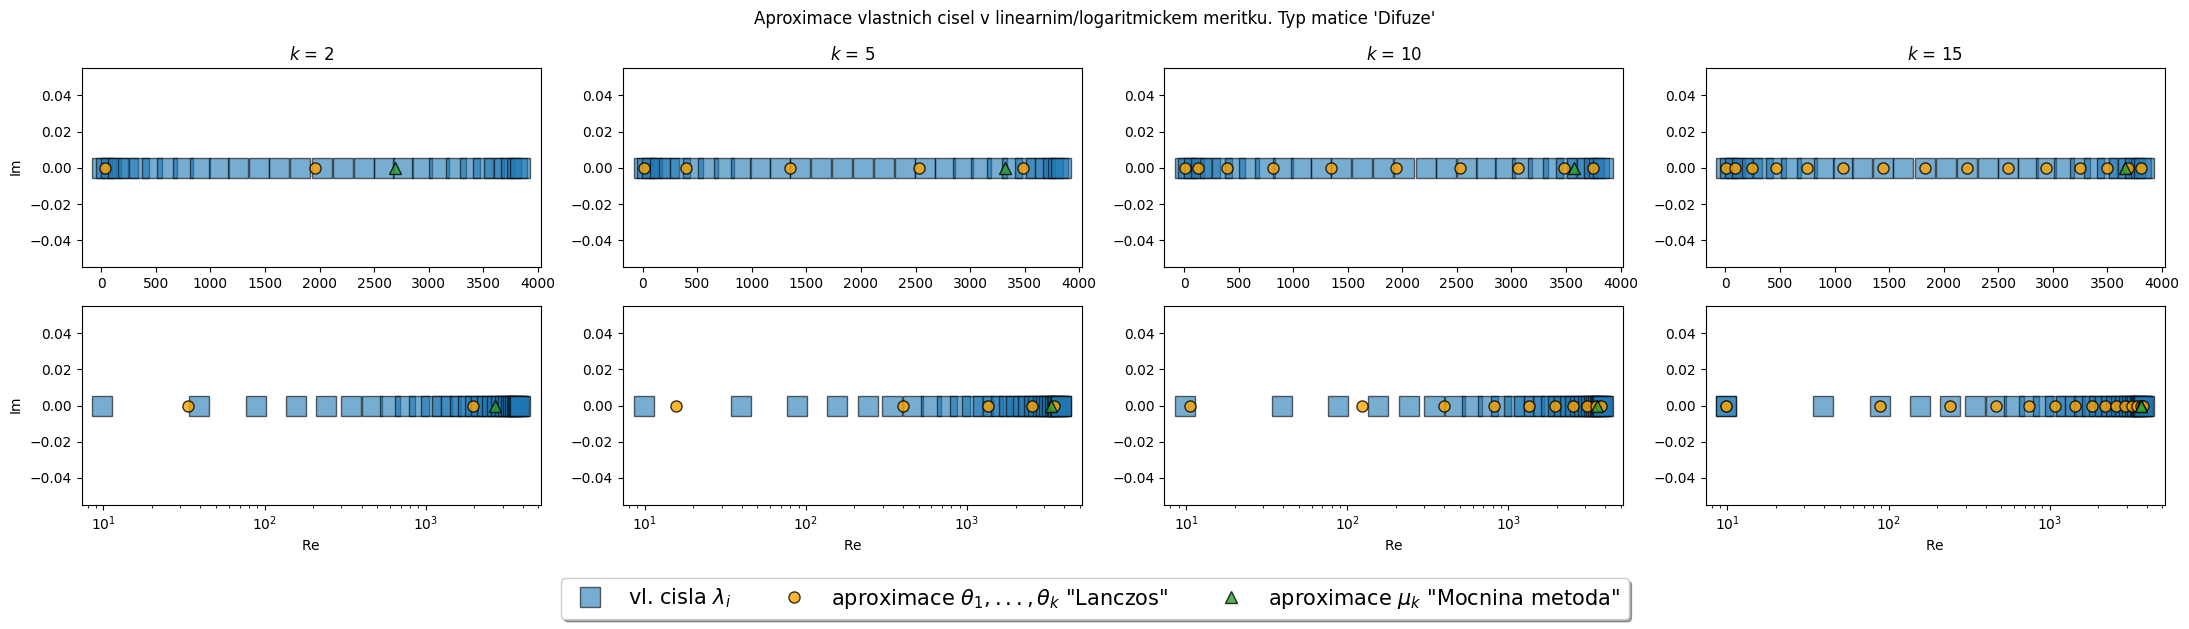

Chyba aproximace dom. vl. cisla po 15 iteracich Lanczose je: 0.007689417025732098
Chyba aproximace dom. vl. cisla po 15 iteracich Mocnine metody je: 0.04593960910906194


In [ ]:
#################################################### Funkce generujici testovaci matice
def get_MaticiDifuze(n):
  ''' Vrati matici "A" odpovidajici problemu difuze ze 3. cviceni (uloha A3), ktera je SPD a prakticky relevantni '''
  h = 1/(n+1); A = 1/h**2 * ( 2*np.diag(np.ones(n),0) - np.diag(np.ones(n-1),-1) - np.diag(np.ones(n-1),1) )
  return A

def RandomMatice(n, cond, LogLin=False):
    """ Vrati nesingularni ctvercovou matici A rozmeru "n"-krat-"n" s cislem podminenosti kappa(A) = "cond".
    Pokud "LogLin=True", pak jsou vl. cisla rozdelena logaritmicky-linearne , jinak jsou rozdelena linearne."""
    GenerNahodCisel = np.random.default_rng(123456789123456789) ### tenhle radek zajistuje, ze ty nahodnz cisla jsou vygenerovanz pri kazdem behu stejne (lze smazat)
    A = GenerNahodCisel.standard_normal(size=(n, n))
    U,_,_ = np.linalg.svd(A)
    if LogLin:
      S = np.diag(np.logspace(np.log10(cond),0, n))
    else:
      S = np.diag(np.linspace(cond, 1, n))
    return U @ S @ U.T
#################################################### Funkce generujici testovaci matice

###################### Volby parametru
n = 30; # velikost matice "A"
PocetKroku_totry = np.array([2,5,10,15]); # pro ktere "k" vykreslime aproximaci spektra "A" -> 4 integery
TypMatice = "Difuze"; # typ matice "A"; na vyber z "Difuze" , "LinearniSpektrum" , "LogLinearniSpektrum"
# TypMatice = "LinearniSpektrum" - A je SPD matice, jeji vl. cisla lambda_1, lambda_2, ..., lambda_n jsou rovnomerne rozdelene body na intervalu (1,100)
# TypMatice = "LogLinearniSpektrum" - A je SPD matice, jeji vl. cisla lambda_1, lambda_2, ..., lambda_n jsou rovnomerne logaritmicky rozdelene body na intervalu (1,100)
#                                     nebo-li log(lambda_1), log(lambda_2), ..., log(lambda_n) jsou rovnomerne rozdelene body na intervalu (0,2)
# TypMatice = "Difuze" - realna aplikace, viz Uloha A3 ve 3. cviceni. Vlastni cisla odpovidaji preskalovanym hodnotam "sin^2", konkretne "lambda_i = 4*(n+1)^2 * sin^2( i/(n+1) * pi/2 )"
#                        tyto vlastni cisl aodpovidaji rozlozeni "hustsi u kraju, ridsi uprostred, ale relativne linearne rovnomerne"
###################### Volby parametru


#################################################### FunVypocet a vykreslovani
if TypMatice == "LinearniSpektrum":
  A = RandomMatice(n, 100); VlCisla_np, VlVektory_np = np.linalg.eigh(A); w0 = np.ones(A.shape[0]);
elif TypMatice == "LogLinearniSpektrum":
  A = RandomMatice(n, 100, True); VlCisla_np, VlVektory_np = np.linalg.eigh(A); w0 = np.ones(A.shape[0]);
elif TypMatice == "Difuze":
  A = get_MaticiDifuze(n); VlCisla_np, VlVektory_np = np.linalg.eigh(A); w0 = np.ones(A.shape[0]);

plt.figure(figsize=(22,6) )
plt.suptitle("Aproximace vlastnich cisel v linearnim/logaritmickem meritku. Typ matice '{}'".format(TypMatice))
for ind in range(0,len(PocetKroku_totry)):
  k = PocetKroku_totry[ind];

  VlCisla_Lancz, VlVektory_Lancz = LanczosAlg_AproxVlstParu(A,w0,k)
  DomCislo_MM, DomVlVekt_MM = MocninnaMetoda(A,w0,k)

  plt.subplot(2,4,ind+1)
  plt.plot(VlCisla_np.real, VlCisla_np.imag, "s", lw=0,  markeredgecolor="k", c="tab:blue", alpha=.6, ms=15, label=r"$\lambda_{i}$")
  plt.plot(VlCisla_Lancz.real, VlCisla_Lancz.imag, "o", lw=0,  markeredgecolor="k", c="orange", alpha=.8, ms=8, label=r"Lanczos, $k$ = {}".format(k))
  plt.plot(DomCislo_MM[-1].real, DomCislo_MM[-1].imag, "^", lw=0,  markeredgecolor="k", c="tab:green", alpha=.8, ms=8, label=r"MM, $k$ = {}".format(k))
  plt.title(r"$k$ = {}".format(k));
  if ind == 0 :
    plt.ylabel(r"$\mathrm{Im}$");

  plt.subplot(2,4,ind+5)
  plt.semilogx(VlCisla_np.real, VlCisla_np.imag, "s", lw=0,  markeredgecolor="k", c="tab:blue", alpha=.6, ms=15, label=r"$\lambda_{i}$")
  plt.semilogx(VlCisla_Lancz.real, VlCisla_Lancz.imag, "o", lw=0,  markeredgecolor="k", c="orange", alpha=.8, ms=8, label=r"Lanczos, $k$ = {}".format(k))
  plt.semilogx(DomCislo_MM[-1].real, DomCislo_MM[-1].imag, "^", lw=0,  markeredgecolor="k", c="tab:green", alpha=.8, ms=8, label=r"MM, $k$ = {}".format(k))
  plt.xlabel(r"$\mathrm{Re}$");
  if ind == 0 :
    plt.ylabel(r"$\mathrm{Im}$");


ax = plt.gca(); fig = plt.gcf(); all_handles = []; all_labels = []
line1, = ax.plot(VlCisla_np[0].real, VlCisla_np[0].imag, 's', alpha=.6, ms=15, color='tab:blue', markeredgecolor='k')
line2, = ax.plot(VlCisla_Lancz[0].real, VlCisla_Lancz[0].imag, 'o', alpha=.8, ms=8, color='orange', markeredgecolor='k')
line3, = ax.plot(DomCislo_MM[-1].real, DomCislo_MM[-1].imag, '^', alpha=.8, ms=8, color='tab:green', markeredgecolor='k')
all_handles.extend([line1,line2,line3])
all_labels.extend([r'vl. cisla $\lambda_i$',
                   r'aproximace $\theta_1,...,\theta_k$ "Lanczos"',
                   r'aproximace $\mu_k$ "Mocnina metoda"'])
fig.legend(all_handles, all_labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), fancybox=True, shadow=True, ncol=3, fontsize=15)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

print( "Chyba aproximace dom. vl. cisla po {} iteracich Lanczose je: {}".format(k, np.abs(VlCisla_Lancz[-1] - VlCisla_np[-1])/np.abs(VlCisla_np[-1]) ))
print( "Chyba aproximace dom. vl. cisla po {} iteracich Mocnine metody je: {}".format(k, np.abs(DomCislo_MM[-1] - VlCisla_np[-1])/np.abs(VlCisla_np[-1]) ))

### ZÚ - porovnání mocninné metody a Lanczoše

---
**Kódění** : Doplňte kód na porovnání rychlosti konvergence Lanczosovi metody a mocninné metody pro naše 3 testovací matice.
  - porovnejte konvergenci - pozorujeme něco nečekaného?

**Kódění** : Na základě předchozí úlohy se zdá, že Lanczošova metoda je vhodná i pro aproximaci $\lambda_1$. Jakou jinou metodu pro aproximaci $\lambda_1$ známe? Jak byste porovnali rychlost konvergence této metody a Lanczoše? Zkuste obě naimplementovat a ověřit si svojí intuici.

---

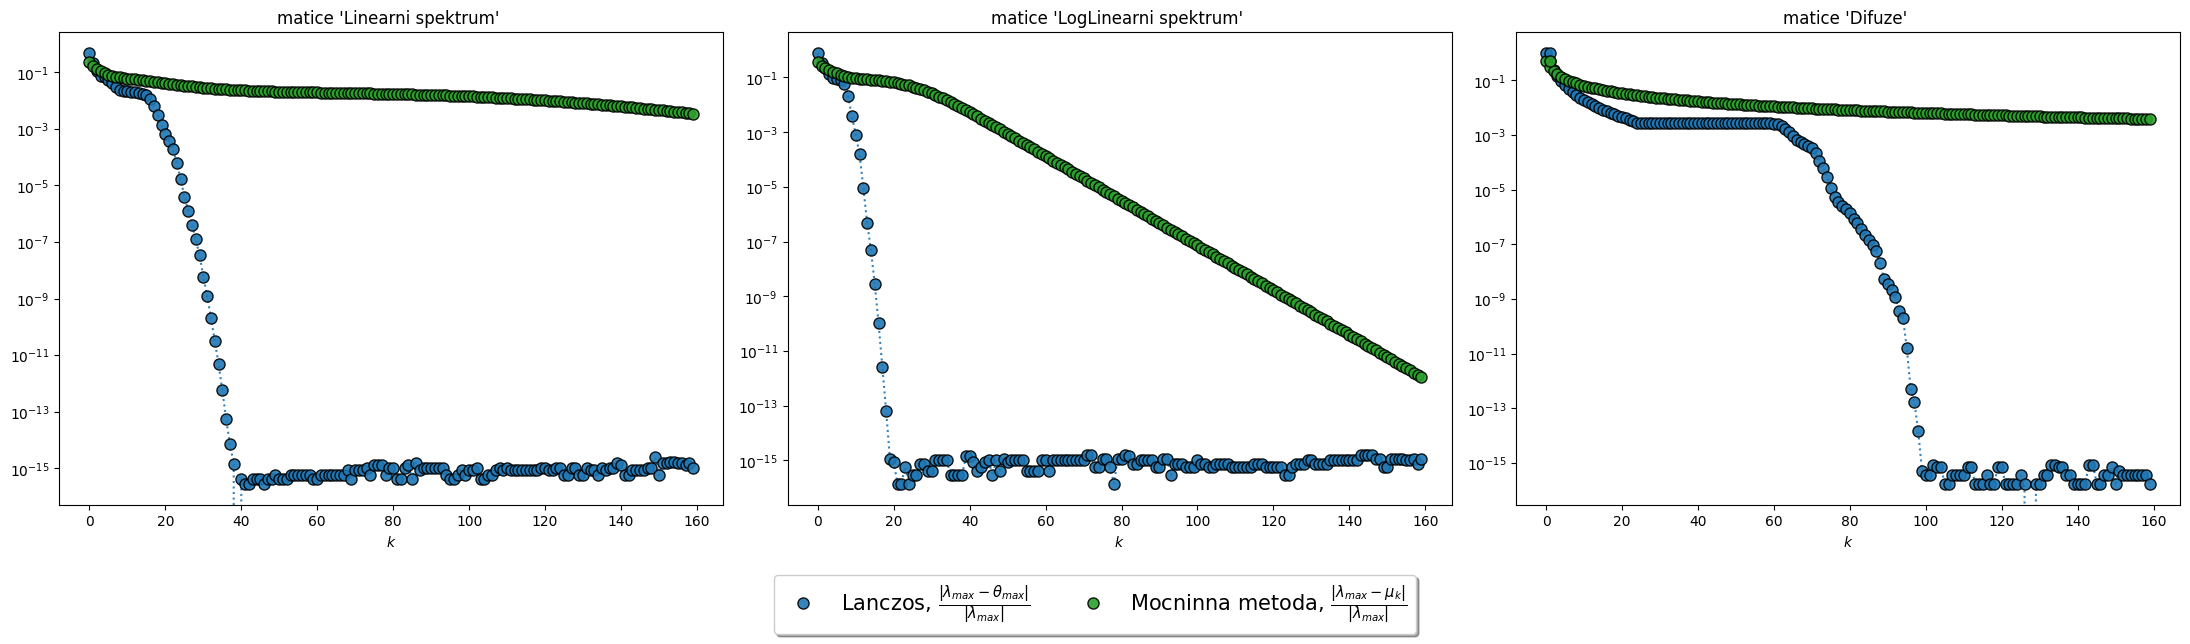

In [ ]:
def get_MaticiDifuze(n):
  ''' Vrati matici "A" odpovidajici problemu difuze ze 3. cviceni (uloha A3), ktera je SPD a prakticky relevantni '''
  h = 1/(n+1); A = 1/h**2 * ( 2*np.diag(np.ones(n),0) - np.diag(np.ones(n-1),-1) - np.diag(np.ones(n-1),1) )
  return A

def RandomMatice(n, cond, LogLin=False):
    """ Vrati nesingularni ctvercovou matici A rozmeru "n"-krat-"n" s cislem podminenosti kappa(A) = "cond".
    Pokud "LogLin=True", pak jsou vl. cisla rozdelena logaritmicky-linearne , jinak jsou rozdelena linearne."""
    GenerNahodCisel = np.random.default_rng(123456789123456789) ### tenhle radek zajistuje, ze ty nahodnz cisla jsou vygenerovanz pri kazdem behu stejne (lze smazat)
    A = GenerNahodCisel.standard_normal(size=(n, n))
    U,_,_ = np.linalg.svd(A)
    if LogLin:
      S = np.diag(np.logspace(np.log10(cond),0, n))
    else:
      S = np.diag(np.linspace(cond, 1, n))
    return U @ S @ U.T
######################################################################################

# inicializace
n = 50; PocetKroku_totry_max = 160;
A_Lin = RandomMatice(n, 100);
A_LogLin = RandomMatice(n, 100, True);
A_Dif = get_MaticiDifuze(n);
w0 = np.ones(n);

ChybaDomVlCisla_Dif_Lancz = np.zeros(PocetKroku_totry_max); ChybaDomVlCisla_Dif_MM = np.zeros(PocetKroku_totry_max);
ChybaDomVlCisla_Lin_Lancz = np.zeros(PocetKroku_totry_max); ChybaDomVlCisla_Lin_MM = np.zeros(PocetKroku_totry_max);
ChybaDomVlCisla_LogLin_Lancz = np.zeros(PocetKroku_totry_max); ChybaDomVlCisla_LogLin_MM = np.zeros(PocetKroku_totry_max);

# vypocet
for ind_k in range(0,PocetKroku_totry_max):
  k =

  # LinearniSpektrum
  VlCisla_np, _ = np.linalg.eigh(A_Lin); LambdaMax_exact = VlCisla_np[-1];

  ChybaDomVlCisla_Lin_Lancz[ind_k] = ...
  ChybaDomVlCisla_Lin_MM[ind_k] = ...

  # LogLinearniSpektrum
  VlCisla_np, _ = np.linalg.eigh(A_LogLin); LambdaMax_exact = VlCisla_np[-1];

  ChybaDomVlCisla_LogLin_Lancz[ind_k] = ...
  ChybaDomVlCisla_LogLin_MM[ind_k] = ...

  # Difuze
  VlCisla_np, _ = np.linalg.eigh(A_Dif); LambdaMax_exact = VlCisla_np[-1];

  ChybaDomVlCisla_Dif_Lancz[ind_k] = ...
  ChybaDomVlCisla_Dif_MM[ind_k] = ...


############################## Vykreslovani
plt.figure( figsize=(22,6) )
plt.subplot(1,3,1)
plt.semilogy(ChybaDomVlCisla_Lin_Lancz, "o:",  markeredgecolor="k", c="tab:blue", alpha=.9, ms=8, label=r"Lanczos, $\frac{|\lambda_{max} - \theta_{max}|}{|\lambda_{max}|}$")
plt.semilogy(ChybaDomVlCisla_Lin_MM, "o:",  markeredgecolor="k", c="tab:green", alpha=.9, ms=8, label=r"MM, $\frac{|\lambda_{max} - \mu_{k}|}{|\lambda_{max}|}$")
plt.xlabel(r"$k$"); plt.title(r"matice 'Linearni spektrum' ");
plt.subplot(1,3,2)
plt.semilogy(ChybaDomVlCisla_LogLin_Lancz, "o:",  markeredgecolor="k", c="tab:blue", alpha=.9, ms=8, label=r"Lanczos, $\frac{|\lambda_{max} - \theta_{max}|}{|\lambda_{max}|}$")
plt.semilogy(ChybaDomVlCisla_LogLin_MM, "o:",  markeredgecolor="k", c="tab:green", alpha=.9, ms=8, label=r"MM, $\frac{|\lambda_{max} - \mu_{k}|}{|\lambda_{max}|}$")
plt.xlabel(r"$k$"); plt.title(r"matice 'LogLinearni spektrum' ");
plt.subplot(1,3,3)
plt.semilogy(ChybaDomVlCisla_Dif_Lancz, "o:",  markeredgecolor="k", c="tab:blue", alpha=.9, ms=8, label=r"Lanczos, $\frac{|\lambda_{max} - \theta_{max}|}{|\lambda_{max}|}$")
plt.semilogy(ChybaDomVlCisla_Dif_MM, "o:",  markeredgecolor="k", c="tab:green", alpha=.9, ms=8, label=r"MM, $\frac{|\lambda_{max} - \mu_{k}|}{|\lambda_{max}|}$")
plt.xlabel(r"$k$"); plt.title(r"matice 'Difuze' ");
ax = plt.gca(); fig = plt.gcf(); all_handles = []; all_labels = []
line1, = ax.plot([1], ChybaDomVlCisla_Dif_Lancz[0], 'o', alpha=.9, ms=8, color='tab:blue', markeredgecolor='k')
line2, = ax.plot([1], ChybaDomVlCisla_Dif_MM[0], 'o', alpha=.9, ms=8, color='tab:green', markeredgecolor='k')
all_handles.extend([line1,line2])
all_labels.extend([r'Lanczos, $\frac{|\lambda_{max} - \theta_{max}|}{|\lambda_{max}|}$',
                   r'Mocninna metoda, $\frac{|\lambda_{max} - \mu_{k}|}{|\lambda_{max}|}$'])
fig.legend(all_handles, all_labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), fancybox=True, shadow=True, ncol=3, fontsize=15)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
############################## Vykreslovani

## [Kvíz](https://forms.gle/CsYKwsizd2mYcNuy8)

